<hr>
<h1 style="text-align: center;">Potential Flow</h1>
<hr>

<h3 style="text-align: center;">Nicholas Richmond</h3>
<h3 style="text-align: center;">Student ID: 919578115</h3>
<h3 style="text-align: center;">Project #: 2</h3>
<h3 style="text-align: center;">Date: 11/1/24</h3>

<h3 style="text-align: center;">EAE 127: Applied Aerodynamics</h3>
<h3 style="text-align: center;">University of California, Davis</h3>

<hr>

In [5]:
#standard imports and setups
import pandas as pd #type: ignore
import numpy as np #type: ignore
import os
import matplotlib.pyplot as plt #type: ignore
### JUPYTER NOTEBOOK SETTINGS ########################################
#Plot all figures in full-size cells, no scroll bars
%matplotlib inline
#Disable Python Warning Output
#(NOTE: Only for production, comment out for debugging)
import warnings
warnings.filterwarnings('ignore')
### PLOTTING DEFAULTS BOILERPLATE (OPTIONAL) #########################
#SET DEFAULT FIGURE APPERANCE
import seaborn as sns #Fancy plotting package #type: ignore
#No Background fill, legend font scale, frame on legend
sns.set_theme(style='whitegrid', font_scale=1.5, rc={'legend.frameon': True})
#Mark ticks with border on all four sides (overrides 'whitegrid')
sns.set_style('ticks')
#ticks point in
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
#fix invisible marker bug
sns.set_context(rc={'lines.markeredgewidth': 0.1})
#restore default matplotlib colormap
mplcolors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
'#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
sns.set_palette(mplcolors)

#Get color cycle for manual colors
colors = sns.color_palette()
#SET MATPLOTLIB DEFAULTS
#(call after seaborn, which changes some defaults)
params = {
#FONT SIZES
'axes.labelsize' : 30, #Axis Labels
'axes.titlesize' : 30, #Title
'font.size' : 28, #Textbox
'xtick.labelsize': 22, #Axis tick labels
'ytick.labelsize': 22, #Axis tick labels
'legend.fontsize': 24, #Legend font size
'font.family' : 'serif',
'font.fantasy' : 'xkcd',
'font.sans-serif': 'Helvetica',
'font.monospace' : 'Courier',
#AXIS PROPERTIES
'axes.titlepad' : 2*6.0, #title spacing from axis
'axes.grid' : True, #grid on plot
'figure.figsize' : (8,8), #square plots
'savefig.bbox' : 'tight', #reduce whitespace in saved figures
#LEGEND PROPERTIES
'legend.framealpha' : 0.5,
'legend.fancybox' : True,
'legend.frameon' : True,
'legend.numpoints' : 1,
'legend.scatterpoints' : 1,
'legend.borderpad' : 0.1,
'legend.borderaxespad' : 0.1,
'legend.handletextpad' : 0.2,
'legend.handlelength' : 1.0,
'legend.labelspacing' : 0,
}
import matplotlib #type:ignore
matplotlib.rcParams.update(params) #update matplotlib defaults, call after￿
### END OF BOILERPLATE ##################################################
colors = sns.color_palette() #color cycle

## Problem 1: Superposition of Elementary Flows
***1.1: Superposition Plot***

The first problem is about plotting superposition of flows. The elementary flows we will deal with are *freestream flow*, *flow sources*, and *flow sinks*. Each plot will also contain *streamlines*, the *dividing streamline*, and the locations of *sources*, *sinks*, and the *stagnation point*.

The following code simluates a doublet

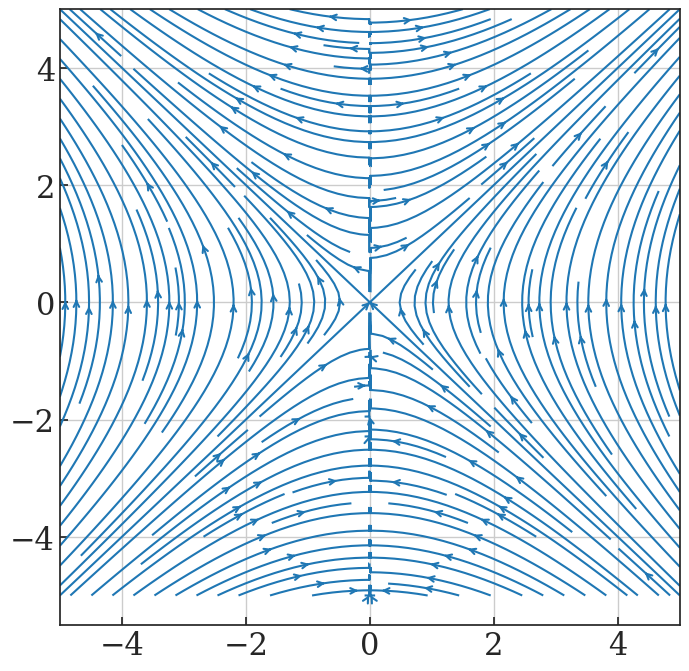

In [ ]:
#Plot a doublet using the superposition of a freestream flow, a source, and a sink

Vinf = 1 #speed of freestream flow
sStrength = 1 #strength of source and sink

xRange = 5 #plot domain
yRange = 5 #plot range

points = 250 #number of points to plot for each line

#slNum = 10 #number of streamlines to plot
#plot the streamlines:
#streamlines = np.arange(-1*slNum/2,slNum/2 + 0.5,0.5)

xVals = np.linspace(-1*xRange,xRange,points)
yVals = np.linspace(-1*yRange,yRange,points)

X, Y = np.meshgrid(xVals,yVals)

uFStream = Vinf * np.ones((points,points),dtype=float)
vFStream = np.zeros((points,points),dtype=float)

uSource = np.empty((points,points))
vSource = np.empty((points,points))

i = 0
for x in xVals:
    j = 0
    for y in yVals:
        if x > 0:
            uSource[i][j] = (sStrength/(2*np.pi)) * (y**2 / ((x**2+y**2)**(3/2) * (1 - ((x**2) / (x**2+y**2)))**(1/2) ))
            vSource[i][j] = (sStrength/(2*np.pi)) * ((x*y) / ((x**2+y**2)**(3/2) * (1 - ((x**2) / (x**2+y**2)))**(1/2)))
        else:
            uSource[i][j] = -1 * (sStrength/(2*np.pi)) * (y**2 / ((x**2+y**2)**(3/2) * (1 - ((x**2) / (x**2+y**2)))**(1/2) ))
            vSource[i][j] = -1 * (sStrength/(2*np.pi)) * ((x*y) / ((x**2+y**2)**(3/2) * (1 - ((x**2) / (x**2+y**2)))**(1/2)))
        j+=1
    i+=1


plt.streamplot(X, Y, uSource, vSource, density=2, linewidth=1.5, arrowsize=1, arrowstyle='->');

